In [3]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from keras.preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten,Conv2D, MaxPooling2D

ImportError: DLL load failed while importing _multiarray_umath: The specified module could not be found.

ImportError: DLL load failed while importing _multiarray_umath: The specified module could not be found.

ImportError: numpy.core._multiarray_umath failed to import

ImportError: numpy.core.umath failed to import

ImportError: DLL load failed while importing _multiarray_umath: The specified module could not be found.

ImportError: numpy.core._multiarray_umath failed to import

ImportError: numpy.core.umath failed to import

ImportError: DLL load failed while importing _multiarray_umath: The specified module could not be found.

ImportError: numpy.core._multiarray_umath failed to import

ImportError: numpy.core.umath failed to import

TypeError: Unable to convert function return value to a Python type! The signature was
	() -> handle

In [5]:
# import os
# import shutil
# import re

# # Path to the folder containing all images
# affectnet_folder = '/mnt/d/RuhunaNew/Academic/Research/Facial_Recog/Group_50/AffectNet'

# # Destination base folder to hold class folders (can be same as affectnet_folder or different)
# dest_base_folder = '/mnt/d/RuhunaNew/Academic/Research/Facial_Recog/Group_50/Affectnet'

# # Create class folders class001 to class007
# for i in range(1, 8):
#     class_folder = os.path.join(dest_base_folder, f'class{str(i).zfill(3)}')
#     os.makedirs(class_folder, exist_ok=True)

# # Regex pattern to extract classXXX from filename
# class_pattern = re.compile(r'class\d{3}')

# # Iterate over all files in the source folder
# for filename in os.listdir(affectnet_folder):
#     # Only process files (skip directories)
#     file_path = os.path.join(affectnet_folder, filename)
#     if not os.path.isfile(file_path):
#         continue

#     # Extract class substring from filename
#     match = class_pattern.search(filename)
#     if match:
#         class_folder_name = match.group(0)  # e.g. 'class001'
#         dest_folder = os.path.join(dest_base_folder, class_folder_name)

#         # Move the file to the corresponding class folder
#         dest_path = os.path.join(dest_folder, filename)
#         shutil.move(file_path, dest_path)
#         print(f"Moved {filename} to {dest_folder}")
#     else:
#         print(f"Class not found in filename: {filename}")


In [3]:
classes = ['anger', 'disgust','fear','happy','neutral','sad','surprise']

In [7]:
# import shutil


# # split 20% from each folder and create validation folder
# dest_base_folder = '/mnt/d/RuhunaNew/Academic/Research/Facial_Recog/Group_50/Affectnet'
# for i in range(1, 8):
#     class_folder = os.path.join(dest_base_folder, classes[i-1])
#     val_folder = os.path.join(dest_base_folder, 'val', classes[i-1])
#     os.makedirs(val_folder, exist_ok=True)

#     # Get all files in the class folder
#     files = os.listdir(class_folder)
    
#     # Calculate the number of files to move (20% of total)
#     num_files_to_move = int(len(files) * 0.2)
    
#     # Move the files to the validation folder
#     for j in range(num_files_to_move):
#         file_path = os.path.join(class_folder, files[j])
#         dest_path = os.path.join(val_folder, files[j])
#         shutil.move(file_path, dest_path)
#         print(f"Moved {files[j]} to {val_folder}")

In [4]:
# Dataset loading
TRAIN_DIR = '/mnt/d/RuhunaNew/Academic/Research/Facial_Recog/Group_50/Affectnet/train/'
TEST_DIR = '/mnt/d/RuhunaNew/Academic/Research/Facial_Recog/Group_50/Affectnet/val/'

In [6]:
def load_dataset(directory):
    image_paths = []
    labels = []

    for label in os.listdir(directory):
        label_path = os.path.join(directory, label)
        if os.path.isdir(label_path):  # Ensure it's a folder
            for filename in os.listdir(label_path):
                img_path = os.path.join(label_path, filename)
                image_paths.append(img_path)
                labels.append(label)
            print(label, "Completed")

    return image_paths, labels

In [7]:

# Load and shuffle dataset
image_paths, labels = load_dataset(TRAIN_DIR)
train = pd.DataFrame({'image': image_paths, 'label': labels})
train = train.sample(frac=1).reset_index(drop=True)
train.head()

anger Completed
disgust Completed
fear Completed
happy Completed
neutral Completed
sad Completed
surprise Completed


,image,label
0,/mnt/d/RuhunaNew/Academic/Research/Facial_Reco...,neutral
1,/mnt/d/RuhunaNew/Academic/Research/Facial_Reco...,anger
2,/mnt/d/RuhunaNew/Academic/Research/Facial_Reco...,disgust
3,/mnt/d/RuhunaNew/Academic/Research/Facial_Reco...,sad
4,/mnt/d/RuhunaNew/Academic/Research/Facial_Reco...,happy


In [8]:
train.shape

(25138, 2)

In [9]:
test = pd.DataFrame()
test['image'],test['label'] = load_dataset(TEST_DIR)
test.head()

anger Completed
disgust Completed
fear Completed
happy Completed
neutral Completed
sad Completed
surprise Completed


,image,label
0,/mnt/d/RuhunaNew/Academic/Research/Facial_Reco...,anger
1,/mnt/d/RuhunaNew/Academic/Research/Facial_Reco...,anger
2,/mnt/d/RuhunaNew/Academic/Research/Facial_Reco...,anger
3,/mnt/d/RuhunaNew/Academic/Research/Facial_Reco...,anger
4,/mnt/d/RuhunaNew/Academic/Research/Facial_Reco...,anger


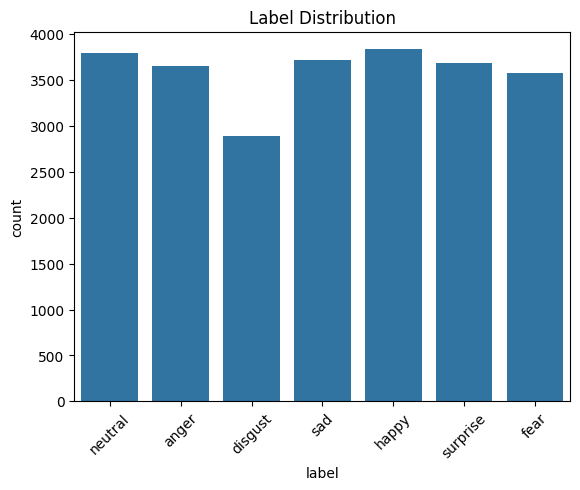

In [10]:
sns.countplot(x='label', data=train)
plt.xticks(rotation=45)  # Optional: rotates x-axis labels for better readability
plt.title("Label Distribution")
plt.show()


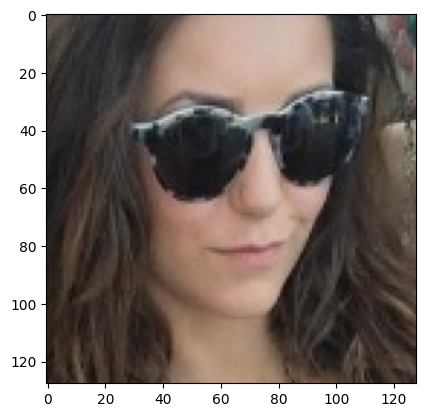

In [11]:
from PIL import Image

img = Image.open(train['image'][0])

plt.imshow(img, cmap='gray')

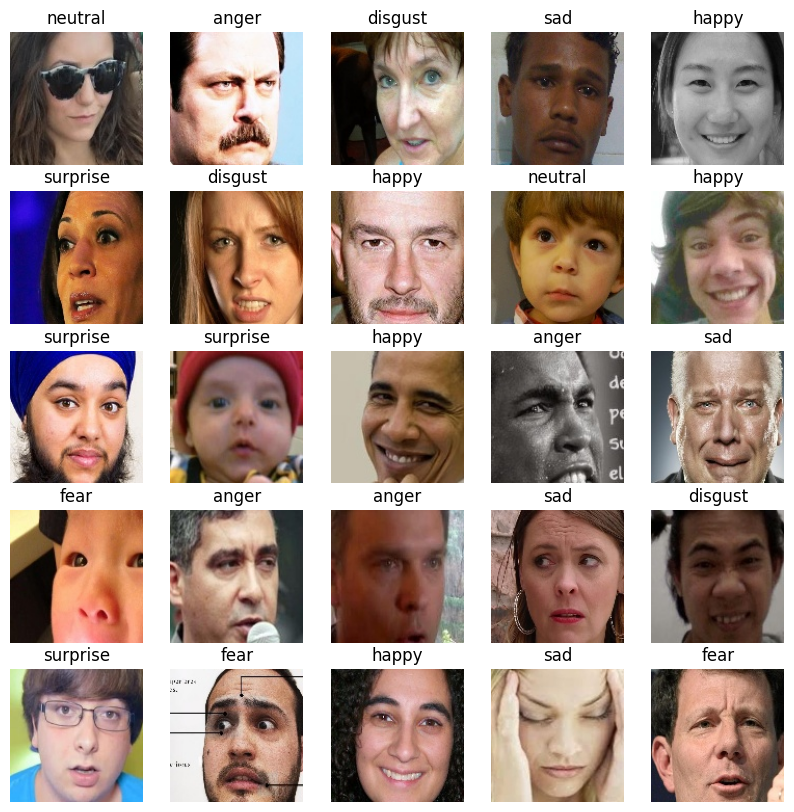

In [12]:
plt.figure(figsize=(10, 10))
files = train.iloc[0:25]

for index,file,label in files.itertuples():
    plt.subplot(5, 5, index + 1)
    img = load_img(file)
    img = np.array(img)
    plt.imshow(img, cmap='gray')
    plt.title(label)
    plt.axis('off')

In [13]:
from tqdm import tqdm

# Feature extraction
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image, color_mode='grayscale', target_size=(128, 128))
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features), 128, 128, 1)
    return features

In [14]:
train_features = extract_features(train['image'])


100%|██████████| 25138/25138 [01:53<00:00, 221.81it/s]


In [15]:
test_features = extract_features(test['image'])

100%|██████████| 6282/6282 [00:33<00:00, 186.13it/s]


In [16]:
# Normalization

X_train = train_features/255.0
X_test = test_features/255.0

In [17]:
# Convert labels to intergers
from  sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(train['label'])
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [18]:
y_train = to_categorical(y_train, num_classes=7)
y_test = to_categorical(y_test, num_classes=7)

In [19]:
y_train[0]

array([0., 0., 0., 0., 1., 0., 0.])

In [20]:
# config

input_shape = (128, 128, 1)
output_class  = 7


In [21]:
# Model Creation

model = Sequential()
model.add(Conv2D(128, (3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))


model.add(Conv2D(256, (3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))


model.add(Conv2D(512, (3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))


model.add(Conv2D(512, (3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

 # full connected layers
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))

# output layer
model.add(Dense(output_class, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

I0000 00:00:1747680465.414690   72859 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5563 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4060 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9


In [ ]:
# train the model

history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_test, y_test), verbose=1)

2025-05-20 00:17:51.234757: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1647443968 exceeds 10% of free system memory.
2025-05-20 00:17:56.966768: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1647443968 exceeds 10% of free system memory.


Epoch 1/50


I0000 00:00:1747680481.163820   73564 service.cc:152] XLA service 0x7f9eb4005d10 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1747680481.165062   73564 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce RTX 4060 Laptop GPU, Compute Capability 8.9
2025-05-20 00:18:01.334466: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1747680482.117378   73564 cuda_dnn.cc:529] Loaded cuDNN version 90300
I0000 00:00:1747680509.296560   73564 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


393/393 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step - accuracy: 0.1493 - loss: 1.9590

2025-05-20 00:20:00.763782: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 411697152 exceeds 10% of free system memory.
2025-05-20 00:20:01.336643: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 411697152 exceeds 10% of free system memory.
2025-05-20 00:20:03.268312: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_126', 8 bytes spill stores, 8 bytes spill loads

2025-05-20 00:20:04.047920: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_126_0', 348 bytes spill stores, 348 bytes spill loads

2025-05-20 00:20:04.762480: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_126_0', 188 bytes spill stor

393/393 ━━━━━━━━━━━━━━━━━━━━ 143s 284ms/step - accuracy: 0.1493 - loss: 1.9590 - val_accuracy: 0.1525 - val_loss: 1.9427
Epoch 2/50
393/393 ━━━━━━━━━━━━━━━━━━━━ 72s 184ms/step - accuracy: 0.1503 - loss: 1.9430 - val_accuracy: 0.1525 - val_loss: 1.9424
Epoch 3/50
393/393 ━━━━━━━━━━━━━━━━━━━━ 73s 186ms/step - accuracy: 0.1511 - loss: 1.9424 - val_accuracy: 0.1525 - val_loss: 1.9425
Epoch 4/50
393/393 ━━━━━━━━━━━━━━━━━━━━ 72s 184ms/step - accuracy: 0.1484 - loss: 1.9431 - val_accuracy: 0.1525 - val_loss: 1.9424
Epoch 5/50
393/393 ━━━━━━━━━━━━━━━━━━━━ 72s 184ms/step - accuracy: 0.1505 - loss: 1.9429 - val_accuracy: 0.1525 - val_loss: 1.9424
Epoch 6/50
393/393 ━━━━━━━━━━━━━━━━━━━━ 72s 184ms/step - accuracy: 0.1511 - loss: 1.9438 - val_accuracy: 0.1525 - val_loss: 1.9424
Epoch 7/50
393/393 ━━━━━━━━━━━━━━━━━━━━ 72s 184ms/step - accuracy: 0.1467 - loss: 1.9438 - val_accuracy: 0.1525 - val_loss: 1.9424
Epoch 8/50
393/393 ━━━━━━━━━━━━━━━━━━━━ 72s 184ms/step - accuracy: 0.1510 - loss: 1.9419 - va

In [ ]:
# save the model
model.save('affectnet_face.h5')
# save the label encoder
import pickle
with open('affectnet_face_encoder.pkl', 'wb') as f:
    pickle.dump(le, f)

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))


plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))


plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()

In [ ]:
import random

image_index = random.randint(0,len(test))
print("Original Output: ", test['label'][image_index])
pred = model.predict(X_test[image_index].reshape(1, 48, 48, 1))
prediction_label = le.inverse_transform([np.argmax()])

print("Predicted Output: ", prediction_label)
plt.imshow(X_test[image_index].reshape(48, 48), cmap='gray')


In [ ]:
# save the model
model.save('face_recognition_model.h5')
# save the label encoder
import pickle
with open('label_encoder.pkl', 'wb') as f:
    pickle.dump(le, f)
# load the model
from keras.models import load_model
model = load_model('face_recognition_model.h5')
# load the label encoder
with open('label_encoder.pkl', 'rb') as f:
    le = pickle.load(f)
# load the test image
test_image = load_img('/mnt/d/RuhunaNew/Academic/Research/Facial_Recog/Group_50/SampleDataset/val/stress/PrivateTest_528072.jpg', color_mode='grayscale', target_size=(48, 48))
test_image = np.array(test_image)
test_image = test_image.reshape(1, 48, 48, 1)
# predict the label
pred = model.predict(test_image)
prediction_label = le.inverse_transform([np.argmax(pred)])
print("Predicted Label: ", prediction_label)

In [ ]:
# predict from webcam in 4 seconds time frame
import cv2
import time
import numpy as np
import os
import pickle
from keras.models import load_model

# Load the model
model = load_model('face_recognition_model.h5')
# Load the label encoder
with open('label_encoder.pkl', 'rb') as f:
    le = pickle.load(f)

# Webcam prediction
cap = cv2.VideoCapture(0)
cap.set(3, 640)
cap.set(4, 480)

start_time = time.time()
duration = 4  # seconds

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Preprocess the frame for the model
    img = cv2.resize(frame, (224, 224))
    img = img.astype('float32') / 255.0
    img = np.expand_dims(img, axis=0)

    # Predict
    preds = model.predict(img)
    pred_label = np.argmax(preds)

    # Display the label on the frame
    cv2.putText(frame, f'Prediction: {pred_label}', (10, 30),
                cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

    cv2.imshow('Webcam Prediction', frame)

    # Exit if 'q' is pressed or after 4 seconds
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
    if time.time() - start_time > duration:
        break

cap.release()
cv2.destroyAllWindows()


In [ ]:
import cv2
import time
import numpy as np
import pickle
from keras.models import load_model
from ultralytics import YOLO

# Load emotion recognition model and label encoder
model = load_model('face_recognition_model.h5')
with open('label_encoder.pkl', 'rb') as f:
    le = pickle.load(f)

# Load YOLOv8n face detector (use a face-detection specific model if possible)
yolo_model = YOLO('yolov8n.pt')  # Replace with 'yolov8n-face.pt' if you have a face-specific model

cap = cv2.VideoCapture(0)
cap.set(3, 640)
cap.set(4, 480)

interval = 4  # seconds
last_prediction_time = time.time()

while True:
    ret, frame = cap.read()
    if not ret:
        continue

    # YOLOv8 expects RGB images
    results = yolo_model.predict(frame, conf=0.5, verbose=False)
    faces = []
    for box in results[0].boxes:
        cls = int(box.cls[0])
        # If using a general model, class 0 is 'person'
        # If using a face model, all detections are faces
        if yolo_model.names[cls] == 'person' or 'face' in yolo_model.names[cls]:
            x1, y1, x2, y2 = map(int, box.xyxy[0])
            faces.append((x1, y1, x2, y2))
            cv2.rectangle(frame, (x1, y1), (x2, y2), (0,255,0), 2)

    cv2.imshow('Webcam (YOLOv8 Face + Emotion)', frame)

    current_time = time.time()
    if current_time - last_prediction_time >= interval and len(faces) > 0:
        # Use the largest face
        x1, y1, x2, y2 = max(faces, key=lambda b: (b[2]-b[0])*(b[3]-b[1]))
        face_img = frame[y1:y2, x1:x2]
        if face_img.size != 0:
            face_gray = cv2.cvtColor(face_img, cv2.COLOR_BGR2GRAY)
            img = cv2.resize(face_gray, (48, 48))
            img = img.astype('float32') / 255.0
            img = np.expand_dims(img, axis=-1)
            img = np.expand_dims(img, axis=0)
            preds = model.predict(img)
            pred_index = np.argmax(preds)
            pred_label = le.inverse_transform([pred_index])[0]
            print(f"Prediction: {pred_label}")
        last_prediction_time = current_time

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()
